# Tree Ensemble

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from telecom_churn_utilities import p_r_curve,evaluate_at_threshold

# Loading Dataset 

In [2]:
df =pd.read_csv('dataset/prepared_dataset.csv')
# This code is preparing the data for a machine learning model.
y = df['Churn'].values
X = df.drop(columns = ['Churn','Unnamed: 0'])

## Spliting Data into Train Test Split.

In [3]:
# The line of code is splitting the dataset `X` and `y` into training and testing sets. The training set is stored in `X_train` and `y_train`, while the testing set is stored in `X_test` and `y_test`. The `test_size` parameter specifies the proportion of the dataset that should be allocated for testing (in this case, 20% of the data). The `random_state` parameter is used to ensure reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_leaf_nodes = 30)

## Fitting the model the X_train and y_train

In [5]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [6]:
# Make predictions
prediction_test = rfc_model.predict(X_test)
print (sk.metrics.accuracy_score(y_test, prediction_test))

0.8104477611940298


### Evaluating the model

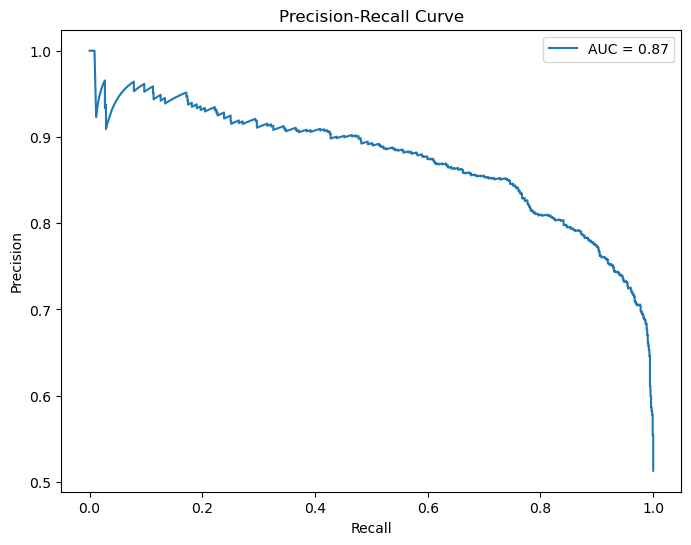

In [7]:
y_proba = rfc_model.predict_proba(X_test)[:, 1]
optimal_threshold = p_r_curve(y_test, y_proba)

Threshold: 0.4243245567982545


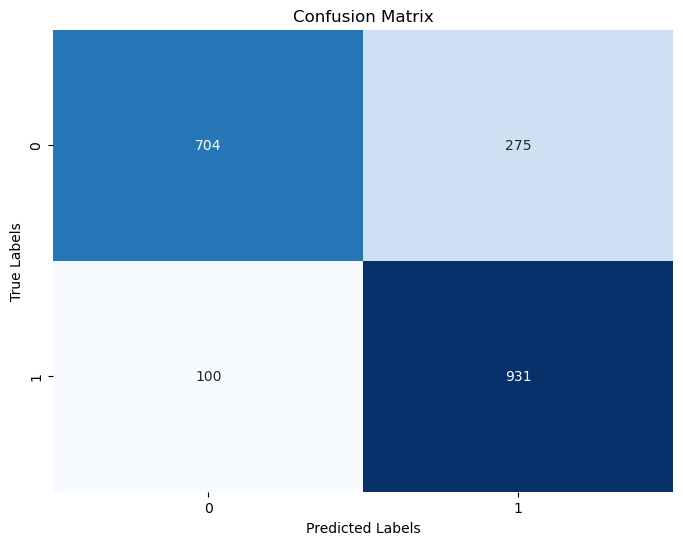

Accuracy: 0.8134328358208955
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       979
           1       0.77      0.90      0.83      1031

    accuracy                           0.81      2010
   macro avg       0.82      0.81      0.81      2010
weighted avg       0.82      0.81      0.81      2010

AUC-ROC Score:
0.8110539565601194




In [8]:
evaluate_at_threshold(y_test, y_proba, optimal_threshold)

# XGBoost

In [9]:
from xgboost import XGBClassifier
xg = XGBClassifier()

## Fitting the model the X_train and y_train

In [10]:
xg.fit(X_train, y_train)
preds = xg.predict(X_test)
sk.metrics.accuracy_score(y_test, preds)

0.8522388059701492

### Evaluating the model

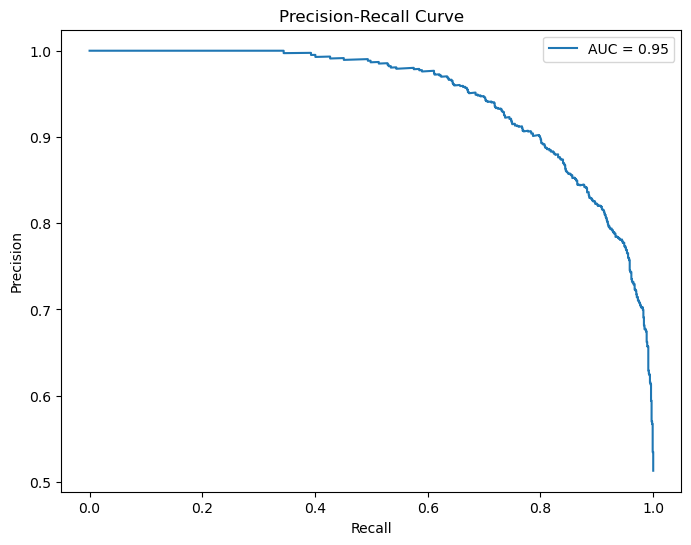

In [11]:
y_proba = xg.predict_proba(X_test)[:, 1]
optimal_threshold = p_r_curve(y_test, y_proba)

Threshold: 0.35648593306541443


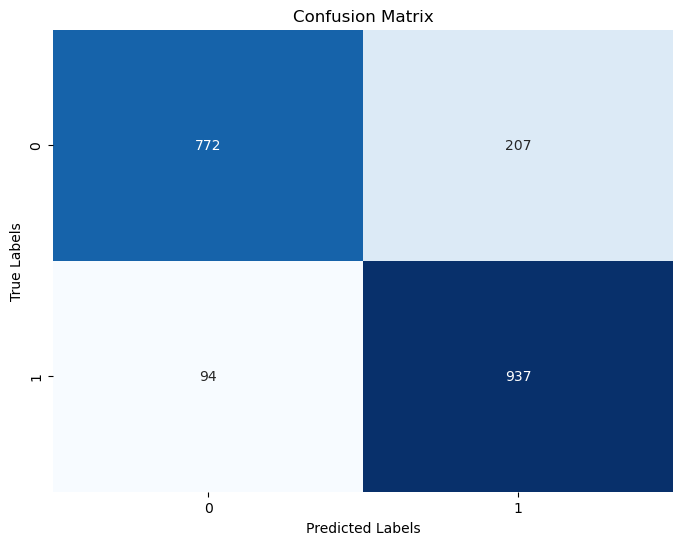

Accuracy: 0.8502487562189055
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       979
           1       0.82      0.91      0.86      1031

    accuracy                           0.85      2010
   macro avg       0.86      0.85      0.85      2010
weighted avg       0.85      0.85      0.85      2010

AUC-ROC Score:
0.8486930685025695




In [12]:
evaluate_at_threshold(y_test, y_proba, optimal_threshold)

# Saving Best Model

In [13]:
import joblib
# Save the model to a file
joblib.dump(rfc_model, 'Trained_Models/random_forest.pkl')
joblib.dump(xg, 'Trained_Models/xgboost.pkl')

['Trained_Models/xgboost.pkl']